# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
y_train0 = pd.read_csv("./Dataset/train/y_train.txt", sep=' ', header=None)
y_test = pd.read_csv("./Dataset/test/y_test.txt", sep=' ', header=None)
X_train0 = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train0, y_train0, test_size=.25, random_state=11)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [19]:
clf0 = DecisionTreeClassifier(max_depth=4, random_state=22)
clf0.fit(X_train, y_train)
importances = clf0.feature_importances_

In [34]:
feature_names = list(X_train.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_names, importances)]
feature_importances.sort(key=lambda x: x[1], reverse=True)
top3_features = feature_importances[:3]
top3_feature_names = [feature for feature, importance in feature_importances[:3]]

print("Top 3 variáveis com maior importância:\n")
for feature, importance in top3_features:
    print(f"{feature}: {importance.round(3)}")

Top 3 variáveis com maior importância:

tGravityAcc-min()-X: 0.28
fBodyAccJerk-energy()-X: 0.257
angle(Y,gravityMean): 0.166


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [37]:
%%time
path = DecisionTreeClassifier(random_state=33).cost_complexity_pruning_path(X_valid[top3_feature_names], y_valid)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: total: 0 ns
Wall time: 14.2 ms


In [39]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=33, ccp_alpha=ccp_alpha).fit(X_valid, y_valid)
    clfs.append(clf)

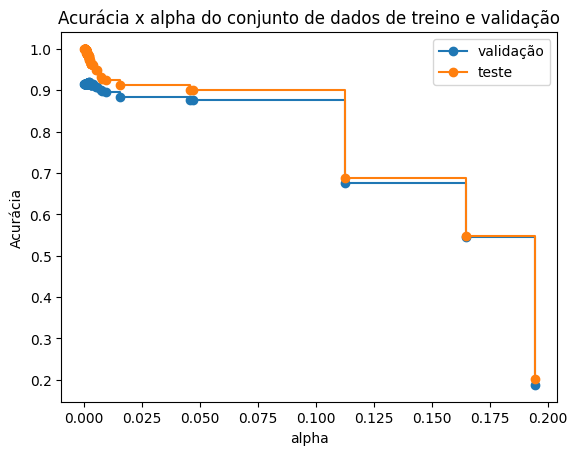

In [40]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [41]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

Acurácia da melhor árvore na base de validação: 100.00


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 86.16


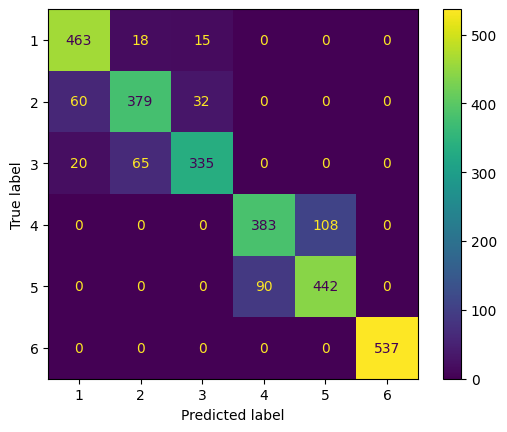

In [43]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test, y_test);